In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
print("✅ Everything works!")

✅ Everything works!


 Reading image

In [16]:
img = cv2.imread(r"C:\Users\Ahmed Esmail\Downloads\input1.jpg")


In [4]:
type(img)

numpy.ndarray

In [5]:
img.shape # height , width , channel 

(480, 480, 3)

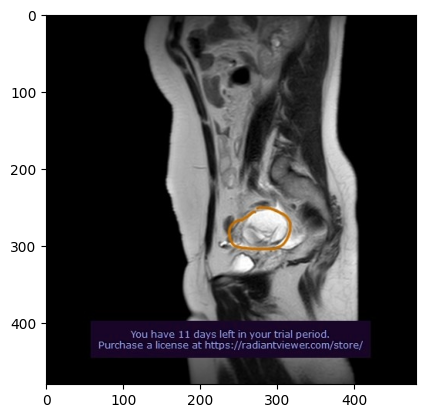

In [6]:
plt.imshow(img)
plt.show()

In [7]:
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

Color conversion



In [8]:
img_RGB=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

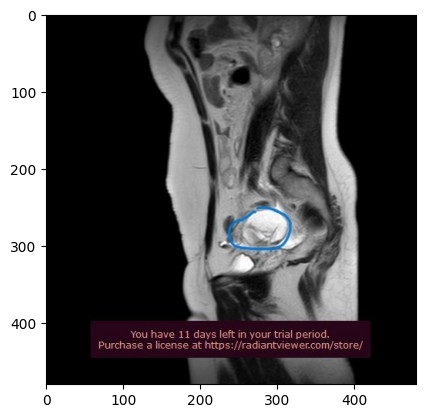

In [9]:
plt.imshow(img_RGB)

In [10]:
cv2.imshow('image',img_RGB)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
img_GRAY=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

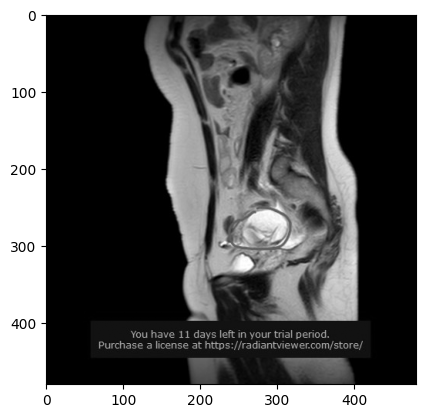

In [12]:
plt.imshow(img_GRAY,cmap='gray')
plt.show()

In [13]:
cv2.imshow('image',img_GRAY)
cv2.waitKey(0)
cv2.destroyAllWindows()

 Resizing Image

In [14]:
img_size=cv2.resize(img_RGB,dsize=(416,416)) # width , height

In [15]:
img_size.shape

(416, 416, 3)

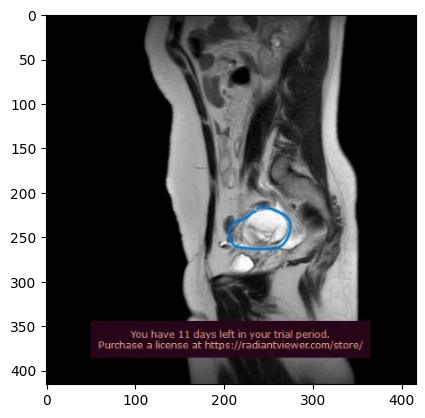

In [16]:
plt.imshow(img_size)
plt.show()

In [18]:
cv2.imshow('image',img_size)
cv2.waitKey(0)
cv2.destroyAllWindows()

Save image

In [ ]:
cv2.imwrite('saved_img.jpg',img_GRAY)

True

HSV Color Space & Trackbar & save image with best value

In [3]:

# Function to do nothing when the trackbar is used (placeholder)
def nothing(x):
    pass

# Load the image
image_path = r"C:\Users\Ahmed Esmail\Downloads\input1.jpg"
image = cv2.imread(image_path)

# Convert the image to HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Create a window to display the results
cv2.namedWindow('Trackbars')

# Create trackbars for adjusting the HSV range
cv2.createTrackbar('H Min', 'Trackbars', 0, 179, nothing) 
cv2.createTrackbar('H Max', 'Trackbars', 179, 179, nothing)
cv2.createTrackbar('S Min', 'Trackbars', 0, 255, nothing)
cv2.createTrackbar('S Max', 'Trackbars', 255, 255, nothing)
cv2.createTrackbar('V Min', 'Trackbars', 0, 255, nothing)
cv2.createTrackbar('V Max', 'Trackbars', 255, 255, nothing)

while True:
    # Get the current positions of the trackbars
    h_min = cv2.getTrackbarPos('H Min', 'Trackbars')
    h_max = cv2.getTrackbarPos('H Max', 'Trackbars')
    s_min = cv2.getTrackbarPos('S Min', 'Trackbars')
    s_max = cv2.getTrackbarPos('S Max', 'Trackbars')
    v_min = cv2.getTrackbarPos('V Min', 'Trackbars')
    v_max = cv2.getTrackbarPos('V Max', 'Trackbars')

    # Create a mask based on the current HSV range
    lower_hsv = np.array([h_min, s_min, v_min])
    upper_hsv = np.array([h_max, s_max, v_max])
    mask = cv2.inRange(hsv_image, lower_hsv, upper_hsv)

    # Apply the mask to get the result
    result = cv2.bitwise_and(image, image, mask=mask)

    # Display the original, mask, and result
    cv2.imshow('Original Image', image)
    cv2.imshow('Mask', mask)
    cv2.imshow('Filtered Image', result)

    key = cv2.waitKey(1) & 0xFF
    if key == ord('q'):  # quit
        break
    elif key == ord('s'):  # save best values + image
        best_values = (h_min, h_max, s_min, s_max, v_min, v_max)
        print("Saved values:", best_values)

        # Save HSV values
        with open("hsv_values.txt", "w") as f:
            f.write(str(best_values))

        # Save filtered image
        cv2.imwrite("filtered_output.png", result)
        print("Filtered image saved as filtered_output.png")

# Release resources
cv2.destroyAllWindows()


Saved values: (0, 124, 92, 255, 90, 255)
Filtered image saved as filtered_output.png


In [4]:
np.unique(hsv_image)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [5]:
np.unique(mask)

array([  0, 255], dtype=uint8)

 Image Processing

In [4]:
# helper function to display gray images
def imshow(filtered_output):
    plt.figure(figsize=(10, 10))
    plt.imshow(img, cmap='gray')
    plt.show()

In [5]:
filtered_output = cv2.imread(r"D:\CS\fk\third year\CV\Tasks\filtered_output.png")

cv2.imshow('Filtered Output', filtered_output)
cv2.waitKey(0)  # wait until any key is pressed
cv2.destroyAllWindows()

Dilation

In [6]:

# Load and convert to grayscale
img = filtered_output.copy()
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Threshold (convert to binary first)
_, img_bin = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

# Copy binary image
image = img_bin.copy()

# Create kernel
kernel = np.ones((5, 5), np.uint8)

# Apply dilation (3 iterations)
dilated_image = cv2.dilate(image, kernel, iterations=10)

# Display results
cv2.imshow('Original Binary Image', image)
cv2.imshow('Dilated Image', dilated_image)

cv2.waitKey(0)
cv2.destroyAllWindows()


Erosion

In [7]:
image = dilated_image.copy()
# Erosion
kernel = np.ones((5, 5), np.uint8)
eroded_image = cv2.erode(image, kernel, iterations=7)
# Display results
cv2.imshow('Original Image', image)
cv2.imshow('Eroded Image', eroded_image)

# Wait for a key press and close windows
cv2.waitKey(0)
cv2.destroyAllWindows()

Bilateral Filter 

In [14]:
oldimage=r"C:\Users\Ahmed Esmail\Downloads\input1.jpg"
image = eroded_image.copy()
# Bilateral Filter
bilateral_filter = cv2.bilateralFilter(image, d=9, sigmaColor=75, sigmaSpace= 75)
# Display results
cv2.imshow('Original Image', image)
cv2.imshow('Bilateral Filter', bilateral_filter)

# Wait for a key press and close windows
cv2.waitKey(0)
cv2.destroyAllWindows()

Final compare 

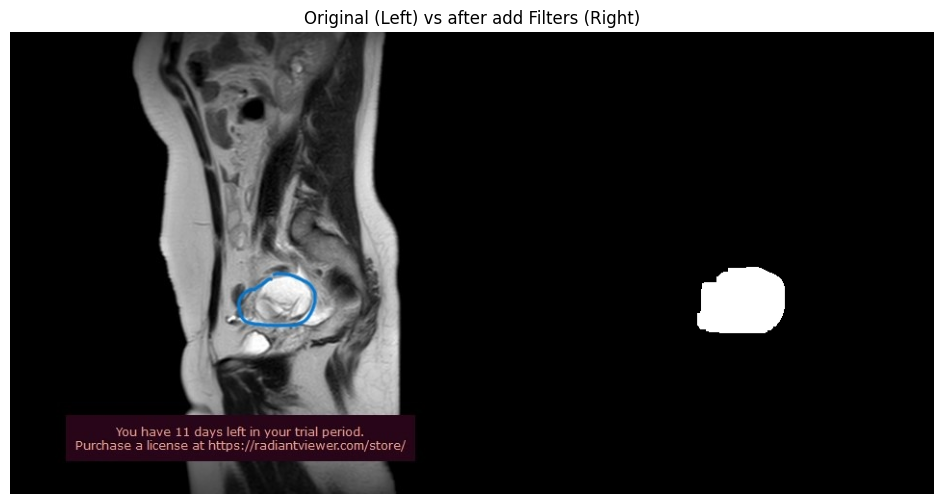

In [21]:
# Take the already created images
original = img.copy()                # 3-channel original
filtered = bilateral_filter.copy()   # bilateral (grayscale)

# Convert grayscale to 3 channels so it matches original
if len(filtered.shape) == 2:  # check if grayscale
    filtered = cv2.cvtColor(filtered, cv2.COLOR_GRAY2BGR)

# Resize filtered to match
h, w = original.shape[:2]
filtered_resized = cv2.resize(filtered, (w, h))

# Stack side by side
combined = np.hstack((original, filtered_resized))

# Convert BGR (OpenCV) to RGB (Matplotlib expects RGB)
combined_rgb = cv2.cvtColor(combined, cv2.COLOR_BGR2RGB)

# Show in notebook
plt.figure(figsize=(12,6))
plt.imshow(combined_rgb)
plt.axis("off")
plt.title("Original (Left) vs after add Filters (Right)")
plt.show()